<a href="https://colab.research.google.com/github/rromerov/rromerov/blob/main/Semana_5_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nombre: Roberto Romero Vielma
* Matrícula: A00822314

# Preprocesamiento de los datos en Python

El preprocesamiento de datos es un paso preliminar durante el proceso de minería de datos. Se trata de cualquier tipo de procesamiento que se realiza con los datos brutos para transformarlos en datos que tengan formatos que sean más fáciles de utilizar.

**También se conoce como**: 
*  Limpieza de datos, cirugía de datos (data wrangling)

## Objetivo de aprendizaje
* Identificar y manejar valores faltantes
* Formatear los datos
* Normalización de los datos (centrar / escalar)
* Agrupación de los datos
* Transformación de valores categorícas a variables númericas

En Python, solemos realizar operaciones a lo largo de las columnas; cada fila de la columna representa una muestra, es decir, un coche usado diferente en la base de datos.

Podemos acceder a una columna especificando el nombre de la columna

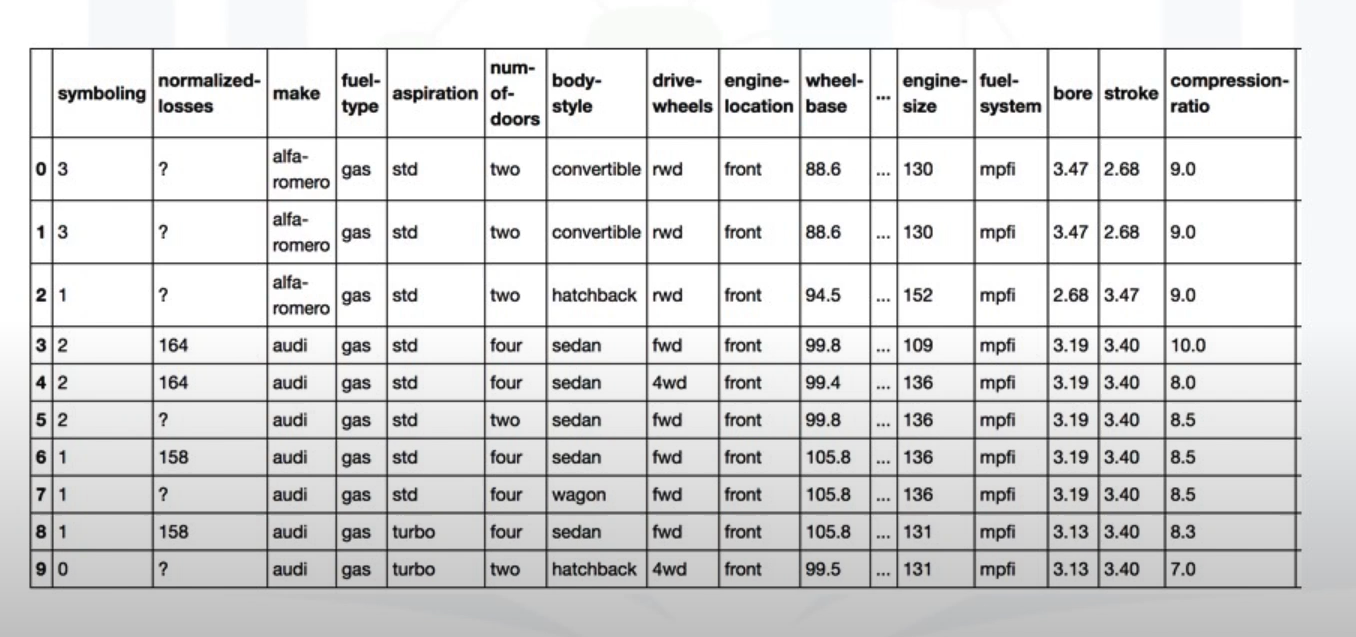


Por ejemplo podemos acceder a "symboling" y "body-style"; cada una de esas columnas es una serie de pandas.

Existen muchas formas de manipular dataframes en Python, para agregar **1** a cada entrada de "symboling" podemos usar el siguiente código:



```
df["symboling"]=df["symboling"]+1
```



# Lidiar con valores faltantes en Python

## Valores faltantes

**¿Qué son?**

- Los datos que faltan, o los valores que faltan, se producen cuando no se tienen datos almacenados para determinadas variables o participantes.
- Puede verse representado como "?", "N/A", 0 o sólo una celda en blanco.
- En los datasets se representan como NaN (Not a Number).
## Como podemos lidiar con valores faltantes?
- Checar con la fuente de recopilación de datos
- Eliminar valores faltantes
  - eliminar la variable
  - eliminar la entrada de datos
- Reemplazar los valores faltantes
  - reemplazar los datos con la media (o puntos de datos similares)
  - reemplazar por la frecuencia
  - reemplazar en base a otras funciones
- Dejar los datos faltantes

## Como eliminar valores faltantes en Python

Usamos **dataframe.dropna():**

Pero antes importamos un dataset con valores faltantes






In [1]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(url, names = headers)

Visualizamos el dataset

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Ahora hacemos uso del método **dropna()**

In [3]:
df.dropna()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Lo que hace este método es eliminar datos que contengan valores faltantes, esencialmente el método **dropna** elimina filas o columnas que contengan valores faltantes como NaN.

Para especificar que buscamos eliminar, debemos poner dentro de dropna, lo siguiente: 
- "axis=0" para eliminar filas
- "axis=1" para eliminar columnas

In [4]:
df=pd.read_csv(url,names = headers)

Al añadir **inplace = True** dentro del método dropna los cambios que hagamos estarán dentro del dataset original de manera directa.

El parámetro **subset** se utiliza para definir la columna donde nos interese eliminar los datos faltantes.

In [5]:
df.dropna(subset=["normalized-losses"],axis=0,inplace=True)

Paralelamente se puede hacer lo siguiente:

In [6]:
df=df.dropna(subset=["normalized-losses"],axis=0)

**Nunca olvidar que esta línea de código no modifica el dataset original por si sola**

In [7]:
df.dropna(subset=["normalized-losses"],axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Para ello debe seguir cualquiera de las siguientes formas de eliminar datos faltantes en el dataset original:

In [8]:
df.dropna(subset=["price"],axis=0,inplace=True)

o 

In [9]:
df=df.dropna(subset=["price"],axis=0)

## Como reemplazar valores faltantes en Python
Para reemplazar valores faltantes con valores reales, la librería de pandas cuenta con un método llamado **replace**, el cual puede ser utilizado para llenar los valores faltantes con unos valores calculados nuevos.

Lo primero que hacemos es calcular el valor con el que queremos reemplazar los valores faltantes

In [10]:
mean=df["city-mpg"].mean()

Ahora utilizamos el método **replace** para rellenar los valores faltantes con el valor calculado (en este caso la media)

El primer parámetro son los valores NaN y el segundo el valor con el cual vamos a llenar esos NaN

In [11]:
import numpy as np
df["city-mpg"].replace(np.nan,mean)

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

Esta es una manera sencilla de reemplazar valores faltantes

# Formato de datos en Python
* Los datos por lo general provienen de diferentes lugares y son guardados en diferentes formatos.
* Traer datos a una expresión estándar común le permite a los usuarios hacer comparaciones significativas.

Por ejemplo:
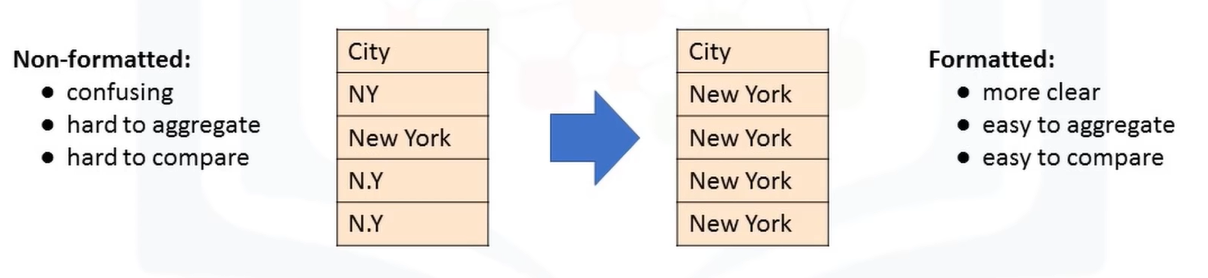

Tal como se puede observar Nueva York tiene diferentes nombres dentro del dataset, por lo cual se debe cambiar el formato, para que se mantenga consistente.

## Aplicando cálculos a columnas enteras

Convertir "mpg" a "L/100km" en el dataset de autos, dado que en algunos países se utiliza el sistema métrico, mientras que en otros se utiliza el sistema inglés,

Para hacerlo en una línea en Python definimos la columna que nos interesa modificar y después ponemos un igual seguido de la operación que deseamos realizar en esa columna

In [12]:
df["city-mpg"]=235/df["city-mpg"]

Ahora renombramos la columna **city-mpg** por **city-L/100km** con el método **rename**

In [13]:
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True)

## Tipos de datos erróneos 
* Algunas veces el tipo incorrecto de dato es asignado a una característica.

In [14]:
df["price"].tail() # aquí se observa que los valores númericos tienen un tipo de dato erróneo

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

* Existen muchos tipos de datos en pandas
* Objetos: "A", "Hello"..
* Int64: 1, 3, 5
* Float64: 2.123, 632.31, 0.12

Para identificar el tipo de dato:
* Usamos **dataframe.dtypes()** para identificar el tipo de dato
Para convertir el tipo de dato:
* Usamos **dataframe.astype()** para convertir el tipo de dato

Por ejemplo: convertir el tipo de dato a entero en la columna **price**


In [15]:
df.price=df["price"].replace("?",0) #existía un dato erróneo dentro de la columna, por lo que el valor fue sustituido

In [16]:
df["price"]=df["price"].astype("int")

Visualizamos como queda la columna

In [17]:
df.price.tail()

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: int64

Como se puede observar ahora la columna cuenta con el tipo de dato correcto

# Normalización de los datos en Python
* La normalización de datos es la organización de los datos para que parezcan similares en todos los registros y campos.
* Aumenta la cohesión de los tipos de entrada, lo que conduce a la depuración, la generación de contactos, la segmentación y los datos de mayor calidad.

Aquí un ejemplo de porque es importante la normalización de datos
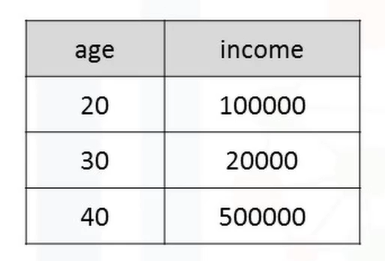

Como se puede observar la edad y el ingreso están en diferentes rangos, lo que los hace difíciles de comparar, por lo que **ingreso** afectará más los resultados, por lo que si deseamos hacer modelos de predicción, tal es el caso de la regresión lineal deberemos normalizar los datos.

Si los normalizamos obtenemos lo siguiente:

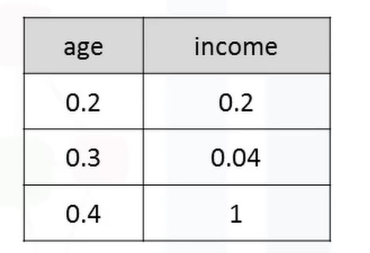

Como se puede apreciar los datos estan dentro de un rango similiar, además de que tienen una influencia intrínseca similar en el modelo análitico.

## Métodos para normalizar datos
Muchas aproximaciones para la normalización:

1. **Escalado simple de características**

$x{_{new}}$ = $\frac{x_{old}}{x_{new}}$ 

Este método divide cada valor por el valor máximo de esa columna, lo que da valores en el rango de 0 a 1.

2. **Min-Max**

$x{_{new}}$ = $\frac{x_{old} - x_{min}}{x_{max}-x_{min}}$ 
 
 Toma cada valor ${x_{old}}$, sustraído del valor mínimo de la columna, después lo divide por el rango de la columna, los resultados estarán en el rango de 0 a 1.

 3. **Z-score**

 $x{_{new}}$ = ${\frac{x_{old}-μ}{σ}}$

Esta fórmula a cada valor le substrae el valor promedio y después lo divide por la desviación estándar, los valores resultantes rondan el 0, y suelen oscilar entre -3 y +3, pero pueden ser mayores
o inferiores. 

Ahora hacemos un ejemplo:
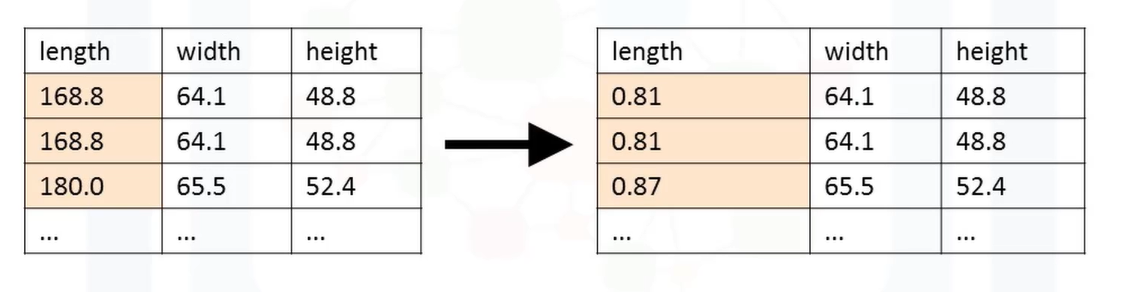





Probamos primero el método de **escalado simple de características**

In [18]:
df["length"]=df["length"]/df["length"].max() #usamos el método máx dentro de pandas

In [19]:
df.length.head() #los valores quedan entre 0 y 1

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

Ahora utilizamos **min-max**, cargamos de nuevo el dataset para visualizar los datos de la columna **length**

In [20]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(url, names = headers)

In [21]:
df.length.head()

0    168.8
1    168.8
2    171.2
3    176.6
4    176.6
Name: length, dtype: float64

Aplicamos ahora el método **min-max**

In [22]:
df["length"]=(df["length"]-df["length"].min())/ (df["length"].max()-df["length"].min())

In [23]:
df.length.head() #los valores quedan entre 0 y 1

0    0.413433
1    0.413433
2    0.449254
3    0.529851
4    0.529851
Name: length, dtype: float64

Por último usamos **z-score**

In [24]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(url, names = headers)

In [25]:
df.length.head()

0    168.8
1    168.8
2    171.2
3    176.6
4    176.6
Name: length, dtype: float64

Aplicamos el método **z-score**, el método mean de pandas regresa la media, mientras que std regresa la desviación estándar 

In [26]:
df["length"]=(df["length"]-df["length"].mean())/df["length"].std()

In [27]:
df.length.head()

0   -0.425480
1   -0.425480
2   -0.230948
3    0.206750
4    0.206750
Name: length, dtype: float64

Los datos quedan en un rango de negativo a positivo, para verificar el rango usamos los método **min** y **max** de pandas

In [28]:
df.length.min()

-2.6707058217664126

In [29]:
df.length.max()

2.759985035125442

Con **z-score** los datos quedan en un rango cercano de -3 a 3